<a href="https://www.kaggle.com/code/serdargundogdu/customer-segmentation-with-unsupervised-learning?scriptVersionId=114725128" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Customer Segmentation with Unsupervised Learning

**Business Problem**

An online shoe selling company willing to set marketing strategies on customer segments which they want to make segmentation. Intended for this, Customer behaviours will be determined and customers will be groupbed by using this aggregated behaviours.

**Story of Dataset**

This dataset has been taken from a shoe selling company. This dataset consists of last orders between 2020 to 2021 years and Customers', who purchased from omnichannel(either of online and offline),historical behaviours data.

12 variables, 19.945 observation, 2.7 MB

**Variables**

master_id: Unique customer id

order_channel: Purchasing platform channel (Android, ios, desktop, mobile)

last_order_channel: Last order channel

first_order_date: Customer's first order date

last_order_date: Customer's last order date

last_order_date_online: Customer's first online order date

last_order_date_offline: Customer's first offline order date

order_num_total_ever_online: Customer's total online order amount

order_num_total_ever_offnline: Customer's total offnline order amount

interested_in_categories_12 Customer's order categories list in last 12 months

# TASK 1. Data Preperations

# Step 1.1. Reading Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/flodata/flo_data_20k.csv")

In [3]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


# Step 1.2. Selecting Variables Using for Customer Segmentation

New variables can be created such as Tenure (Customer Age), Recency (Number of days before from Last purchase date)

In [4]:
import datetime as dt
df['tenure'] = (pd.to_datetime('today') - pd.to_datetime(df['first_order_date'])).dt.days
df['recency'] = (pd.to_datetime('today') - pd.to_datetime(df['last_order_date'])).dt.days
df['frequency'] = df['order_num_total_ever_online'] + df['order_num_total_ever_offline']
df['monetary'] = df['customer_value_total_ever_online'] + df['customer_value_total_ever_offline']
df["order_num_total"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
df["customer_value_total"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]

In [5]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,tenure,recency,frequency,monetary,order_num_total,customer_value_total
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],786,667,5.0,939.37,5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",2146,677,21.0,2013.55,21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",1124,758,5.0,585.32,5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",718,707,2.0,121.97,2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],1240,658,2.0,209.98,2.0,209.98


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [7]:
num_cols = [col for col in df.columns if df[col].dtypes !="O"]

In [8]:
df[num_cols].head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,tenure,recency,frequency,monetary,order_num_total,customer_value_total
0,4.0,1.0,139.99,799.38,786,667,5.0,939.37,5.0,939.37
1,19.0,2.0,159.97,1853.58,2146,677,21.0,2013.55,21.0,2013.55
2,3.0,2.0,189.97,395.35,1124,758,5.0,585.32,5.0,585.32
3,1.0,1.0,39.99,81.98,718,707,2.0,121.97,2.0,121.97
4,1.0,1.0,49.99,159.99,1240,658,2.0,209.98,2.0,209.98


In [9]:
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)

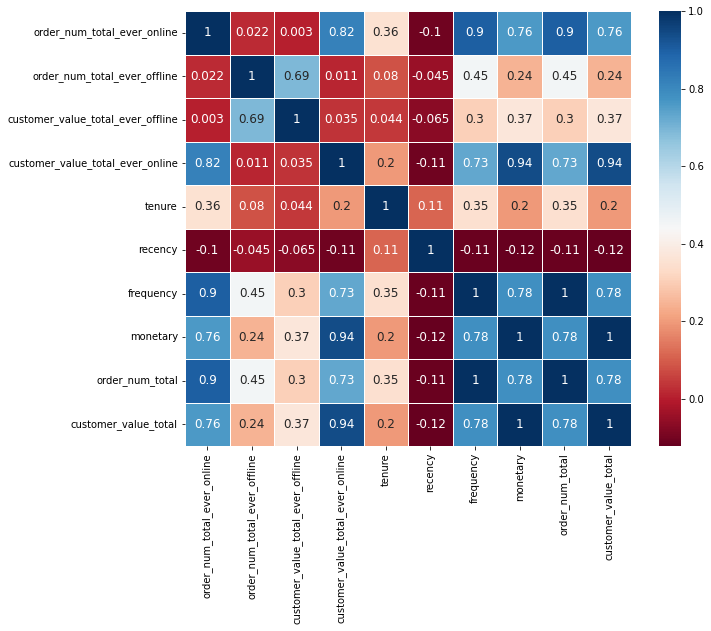

In [10]:
correlation_matrix(df, num_cols)

In [11]:
cat_cols = ["order_channel", "last_order_channel"]

In [12]:
df[cat_cols].nunique()

order_channel         4
last_order_channel    5
dtype: int64

In [13]:
for col in cat_cols:
    print(df[col].unique())

['Android App' 'Desktop' 'Mobile' 'Ios App']
['Offline' 'Mobile' 'Android App' 'Desktop' 'Ios App']


In [14]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [15]:
df = one_hot_encoder(df, cat_cols)

In [16]:
df.head()

,master_id,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,...,monetary,order_num_total,customer_value_total,order_channel_Desktop,order_channel_Ios App,order_channel_Mobile,last_order_channel_Desktop,last_order_channel_Ios App,last_order_channel_Mobile,last_order_channel_Offline
0,cc294636-19f0-11eb-8d74-000d3a38a36f,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],...,939.37,5.0,939.37,0,0,0,0,0,0,1
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",...,2013.55,21.0,2013.55,0,0,0,0,0,1,0
2,69b69676-1a40-11ea-941b-000d3a38a36f,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",...,585.32,5.0,585.32,0,0,0,0,0,0,0
3,1854e56c-491f-11eb-806e-000d3a38a36f,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",...,121.97,2.0,121.97,0,0,0,0,0,0,0
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],...,209.98,2.0,209.98,1,0,0,1,0,0,0


# TASK 2. Customer Segmentation with K-Means

# Step 2.1. Standardization of Variables

In [17]:
df.iloc[:,-7:]

,order_channel_Desktop,order_channel_Ios App,order_channel_Mobile,last_order_channel_Desktop,last_order_channel_Ios App,last_order_channel_Mobile,last_order_channel_Offline
0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...
19940,0,0,0,0,0,0,1
19941,1,0,0,1,0,0,0
19942,0,1,0,0,1,0,0
19943,0,0,0,0,0,0,0


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df[num_cols])
X = pd.DataFrame(X, columns=num_cols)
X = X.merge(df.iloc[:,-7:],left_index=True, right_index=True)
X.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,tenure,recency,frequency,monetary,order_num_total,customer_value_total,order_channel_Desktop,order_channel_Ios App,order_channel_Mobile,last_order_channel_Desktop,last_order_channel_Ios App,last_order_channel_Mobile,last_order_channel_Offline
0,0.210422,-0.443039,-0.377854,0.362797,-1.122127,-0.382058,-0.005222,0.210107,-0.005222,0.210107,0,0,0,0,0,0,1
1,3.760263,0.041732,-0.311591,1.628981,1.476349,-0.285232,3.368463,1.409799,3.368463,1.409799,0,0,0,0,0,1,0
2,-0.026234,0.041732,-0.212097,-0.122477,-0.476329,0.499055,-0.005222,-0.185312,-0.005222,-0.185312,0,0,0,0,0,0,0
3,-0.499547,-0.443039,-0.709501,-0.498860,-1.252050,0.005244,-0.637788,-0.702802,-0.637788,-0.702802,0,0,0,0,0,0,0
4,-0.499547,-0.443039,-0.676337,-0.405164,-0.254694,-0.469201,-0.637788,-0.604508,-0.637788,-0.604508,1,0,0,1,0,0,0


In [19]:
X.shape

(19945, 17)

# Step 2.2. Specifying Optimum Clustering Number

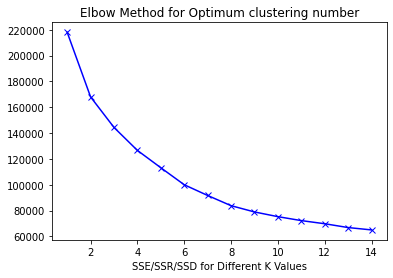

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans()
ssd = []
K = range(1, 15)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(X)
    ssd.append(kmeans.inertia_)
    
plt.plot(K, ssd, "bx-")
plt.xlabel("SSE/SSR/SSD for Different K Values")
plt.title("Elbow Method for Optimum clustering number")
plt.show()

In [21]:
# pip install yellowbrick

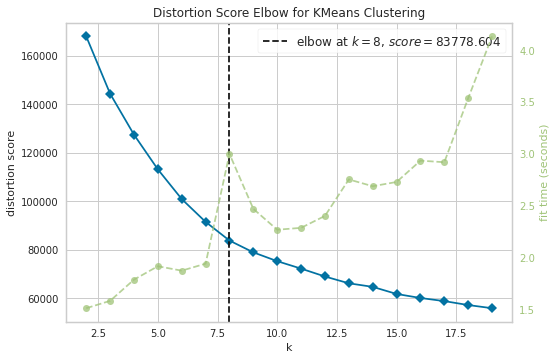

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(X)
elbow.show(block=True)

In [23]:
elbow.elbow_value_

8

# Step 2.3. Modelling and Segmentation of Customers

In [24]:
kmeans = KMeans(n_clusters=elbow.elbow_value_, init='k-means++', random_state=1).fit(X)
kmeans.cluster_centers_ 

array([[-1.54428859e-01,  1.40321766e+00,  1.69780161e+00,
        -1.01299727e-01, -5.09112729e-02, -2.93099522e-01,
         4.72748606e-01,  4.77551464e-01,  4.72748606e-01,
         4.77551464e-01,  1.13283496e-01,  1.63887292e-01,
         2.24266820e-01,  4.71535365e-02,  6.78550891e-02,
         8.97067280e-02,  5.54341576e-01],
       [-3.13665491e-01, -1.99480571e-01, -2.32380623e-01,
        -2.55185500e-01, -2.56988868e-01,  1.17923314e+00,
        -3.66234760e-01, -3.15543483e-01, -3.66234760e-01,
        -3.15543483e-01,  1.33234090e-01,  1.54261258e-01,
         2.62560476e-01,  8.28061035e-02,  9.67621883e-02,
         1.56866394e-01,  3.40342389e-01],
       [ 1.81208273e-02, -3.63535339e-02, -4.58754718e-02,
        -1.58134375e-01,  2.27402353e+00,  3.15480369e-01,
         3.32981287e-04, -1.62492280e-01,  3.32981287e-04,
        -1.62492280e-01,  4.48502994e-01,  7.00598802e-02,
         2.73652695e-01,  7.00598802e-02,  3.71257485e-02,
         8.56287425e-02,  6.9

In [25]:
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'random_state': 1,
 'tol': 0.0001,
 'verbose': 0}

In [26]:
clusters_kmeans = kmeans.labels_
X["cluster"] = clusters_kmeans   
X.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,tenure,recency,frequency,monetary,order_num_total,customer_value_total,order_channel_Desktop,order_channel_Ios App,order_channel_Mobile,last_order_channel_Desktop,last_order_channel_Ios App,last_order_channel_Mobile,last_order_channel_Offline,cluster
0,0.210422,-0.443039,-0.377854,0.362797,-1.122127,-0.382058,-0.005222,0.210107,-0.005222,0.210107,0,0,0,0,0,0,1,7
1,3.760263,0.041732,-0.311591,1.628981,1.476349,-0.285232,3.368463,1.409799,3.368463,1.409799,0,0,0,0,0,1,0,6
2,-0.026234,0.041732,-0.212097,-0.122477,-0.476329,0.499055,-0.005222,-0.185312,-0.005222,-0.185312,0,0,0,0,0,0,0,1
3,-0.499547,-0.443039,-0.709501,-0.498860,-1.252050,0.005244,-0.637788,-0.702802,-0.637788,-0.702802,0,0,0,0,0,0,0,7
4,-0.499547,-0.443039,-0.676337,-0.405164,-0.254694,-0.469201,-0.637788,-0.604508,-0.637788,-0.604508,1,0,0,1,0,0,0,7


In [27]:
X["cluster"].value_counts()            
X["cluster"].value_counts() / len(X) * 100

7    43.359238
1    26.944096
5    10.373527
0     8.759087
2     8.373026
6     2.090750
3     0.065179
4     0.035097
Name: cluster, dtype: float64

# Step 2.4. Statistical Analysis of Each Segment

In [28]:
X.groupby('cluster').agg(['mean', 'median', 'count', 'std']).T

cluster                                        0            1            2  \
order_num_total_ever_online  mean      -0.154655    -0.313621     0.018121   
                             median    -0.262891    -0.499547    -0.026234   
                             count   1747.000000  5374.000000  1670.000000   
                             std        0.384025     0.272217     0.501817   
order_num_total_ever_offline mean       1.399480    -0.199481    -0.036354   
...                                          ...          ...          ...   
last_order_channel_Mobile    std        0.286075     0.363709     0.279899   
last_order_channel_Offline   mean       0.555238     0.340156     0.697605   
                             median     1.000000     0.000000     1.000000   
                             count   1747.000000  5374.000000  1670.000000   
                             std        0.497082     0.473806     0.459433   

cluster                                      3          4            5  \
order_num_total_ever_online  mean     0.046583  20.326189     1.195021   
                             median  -0.262891  15.593067     1.157046   
                             count   13.000000   7.000000  2069.000000   
                             std      0.787183  14.238753     0.673895   
order_num_total_ever_offline mean    25.287129  -0.166027    -0.055737   
...                                        ...        ...          ...   
last_order_channel_Mobile    std      0.277350   0.000000     0.354604   
last_order_channel_Offline   mean     0.846154   0.285714     0.146448   
                             median   1.000000   0.000000     0.000000   
                             count   13.000000   7.000000  2069.000000   
                             std      0.375534   0.487950     0.353640   

cluster                                       6            7  
order_num_total_ever_online  mean      4.168878    -0.280815  
                             median    3.760263    -0.499547  
                             count   417.000000  8648.000000  
                             std       1.991831     0.286278  
order_num_total_ever_offline mean      0.297487    -0.190619  
...                                         ...          ...  
last_order_channel_Mobile    std       0.310644     0.395478  
last_order_channel_Offline   mean      0.129496     0.263067  
                             median    0.000000     0.000000  
                             count   417.000000  8648.000000  
                             std       0.336152     0.440324  

[68 rows x 8 columns]

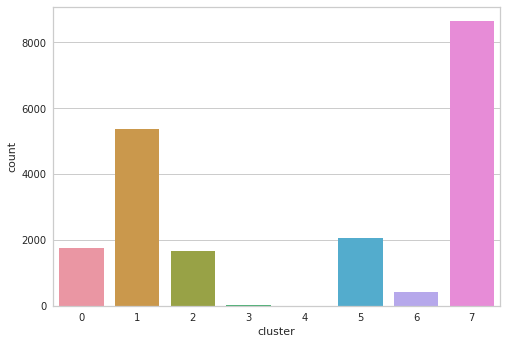

In [29]:
sns.countplot(x='cluster', data=X)
plt.show()

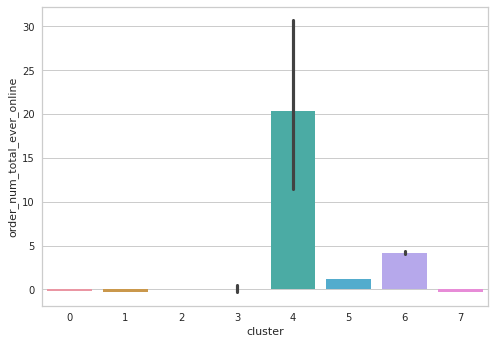

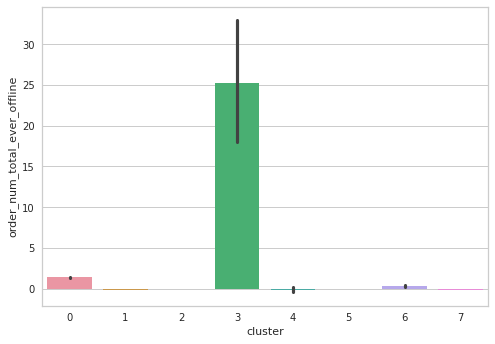

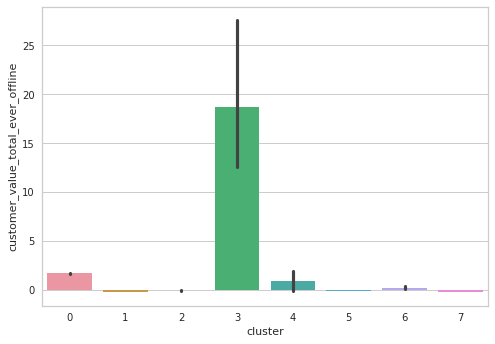

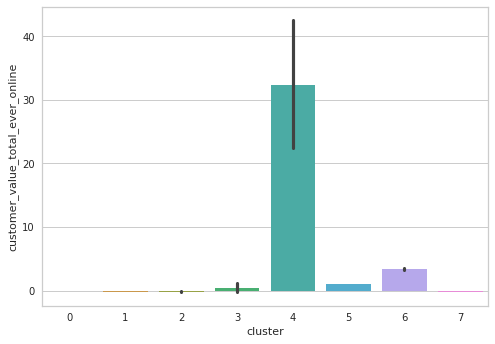

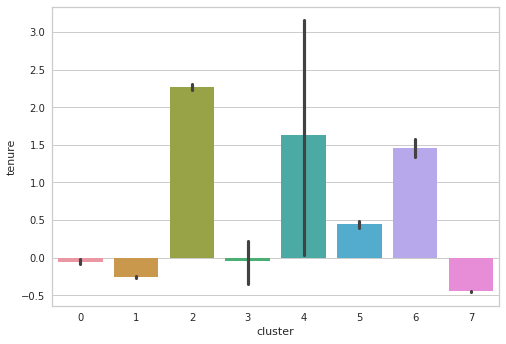

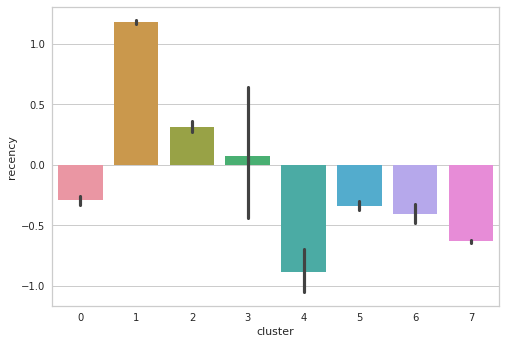

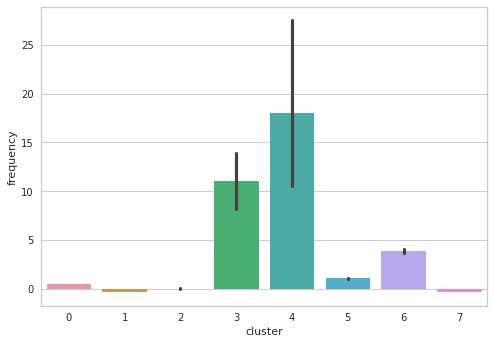

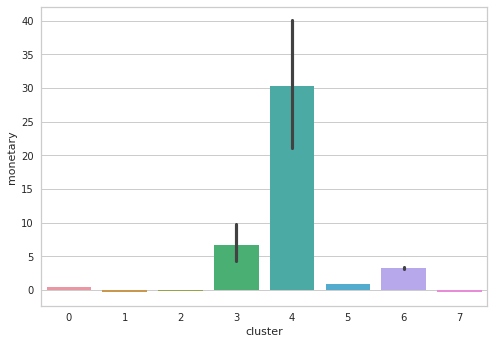

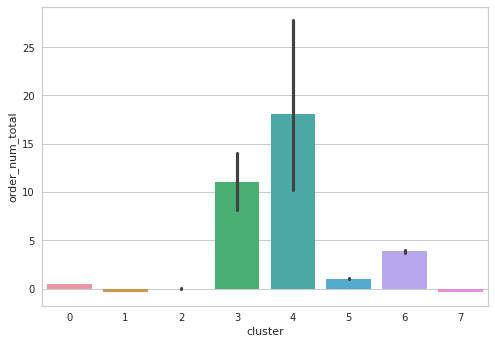

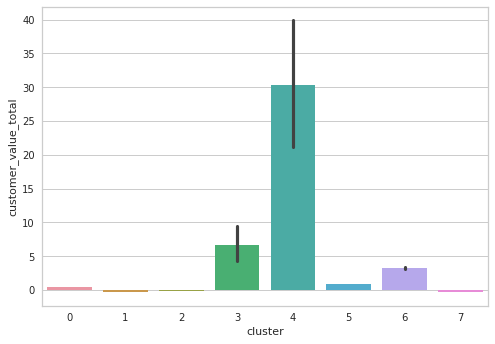

In [30]:
for i in num_cols:
    sns.barplot(x='cluster', y=i, data=X)
    plt.show()

# TASK 3. Customer Segmentation with Hiearchical Clustering 

# Step 3.1. Specifying Optimum Clustering Number by Using Standardized DataFrame in Task 2

In [31]:
from scipy.cluster.hierarchy import linkage, dendrogram

hc_average = linkage(X, "average")  
hc_ward = linkage(X, "ward")  
hc_complete = linkage(X, "complete") 
hc_single = linkage(X, "single")  
hc_centroid = linkage(X, "centroid")

In [32]:
def plot_hc(hc_type):
    plt.figure(figsize=(7, 5))
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Observation Units")
    plt.ylabel("Distances")
    dendrogram(hc_type,
               truncate_mode="lastp",
               p=10,
               show_contracted=True,
               leaf_font_size=10)
    plt.show()

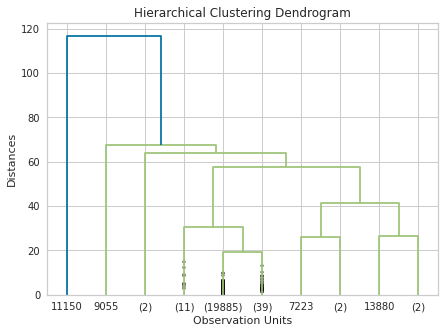

In [33]:
plot_hc(hc_average)

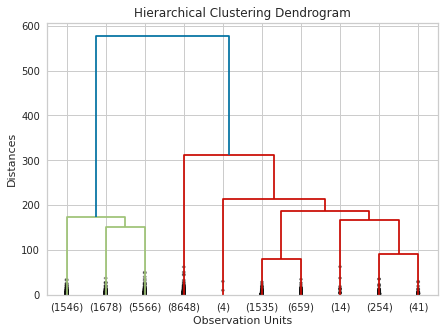

In [34]:
plot_hc(hc_ward)

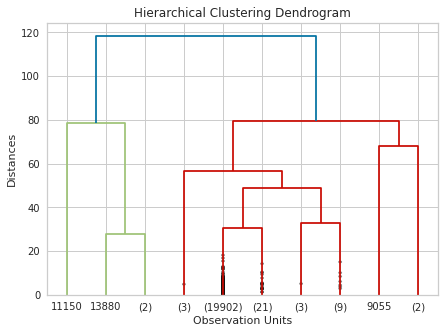

In [35]:
plot_hc(hc_complete)

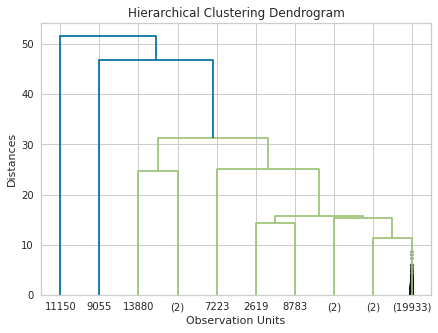

In [36]:
plot_hc(hc_single)

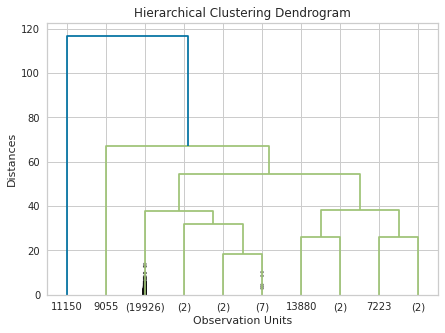

In [37]:
plot_hc(hc_centroid)

# Step 3.2. Creating Model and Segmentation of Customers

In [38]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clusters_hc = hc.fit_predict(X)
clusters_hc
X['cluster_hc'] = clusters_hc
X.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,tenure,recency,frequency,monetary,order_num_total,customer_value_total,order_channel_Desktop,order_channel_Ios App,order_channel_Mobile,last_order_channel_Desktop,last_order_channel_Ios App,last_order_channel_Mobile,last_order_channel_Offline,cluster,cluster_hc
0,0.210422,-0.443039,-0.377854,0.362797,-1.122127,-0.382058,-0.005222,0.210107,-0.005222,0.210107,0,0,0,0,0,0,1,7,2
1,3.760263,0.041732,-0.311591,1.628981,1.476349,-0.285232,3.368463,1.409799,3.368463,1.409799,0,0,0,0,0,1,0,6,0
2,-0.026234,0.041732,-0.212097,-0.122477,-0.476329,0.499055,-0.005222,-0.185312,-0.005222,-0.185312,0,0,0,0,0,0,0,1,1
3,-0.499547,-0.443039,-0.709501,-0.498860,-1.252050,0.005244,-0.637788,-0.702802,-0.637788,-0.702802,0,0,0,0,0,0,0,7,2
4,-0.499547,-0.443039,-0.676337,-0.405164,-0.254694,-0.469201,-0.637788,-0.604508,-0.637788,-0.604508,1,0,0,1,0,0,0,7,2


In [39]:
X["cluster_hc"].unique()

array([2, 0, 1])

In [40]:
X["cluster_hc"].value_counts()

1    8790
2    8648
0    2507
Name: cluster_hc, dtype: int64

# Step 3.3. Statistical Analysis of Each Segment

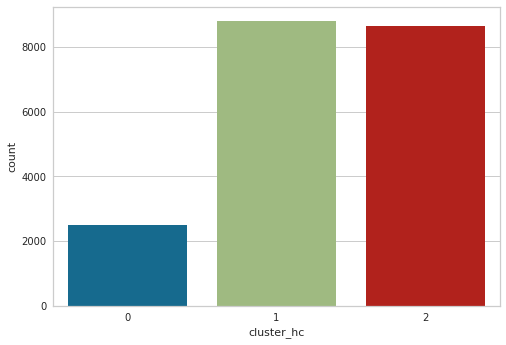

In [41]:
sns.countplot(x='cluster_hc', data=X)
plt.show()

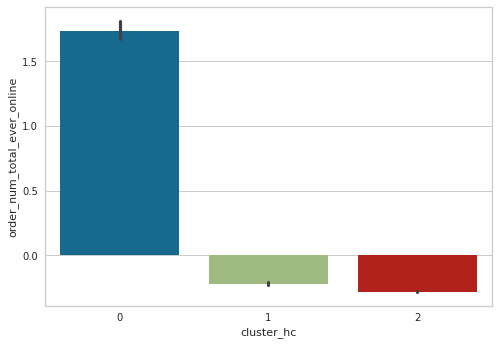

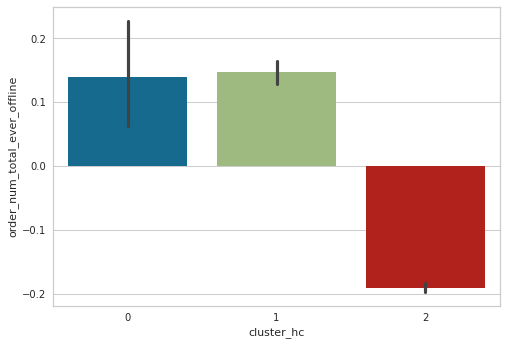

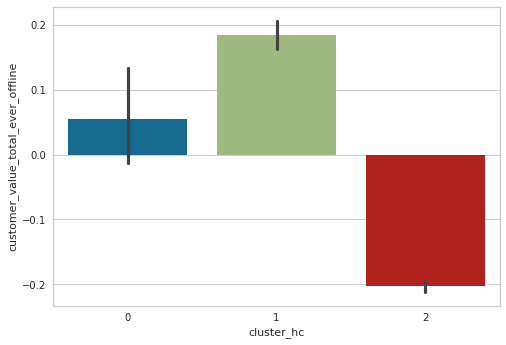

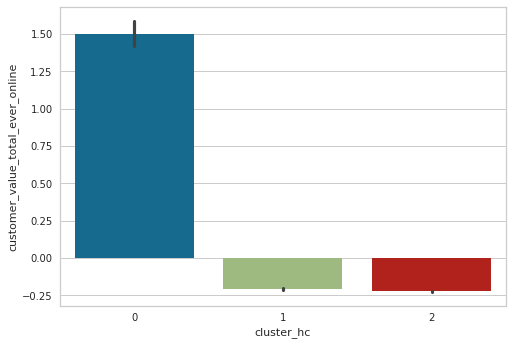

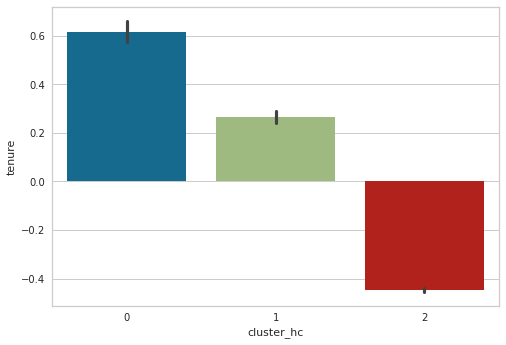

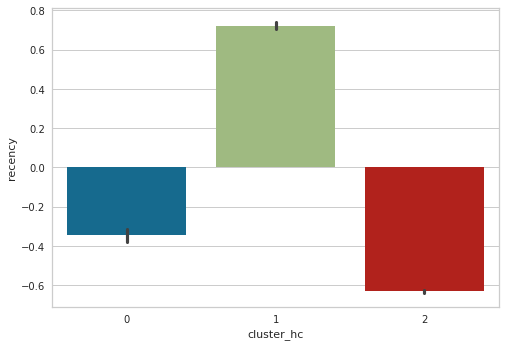

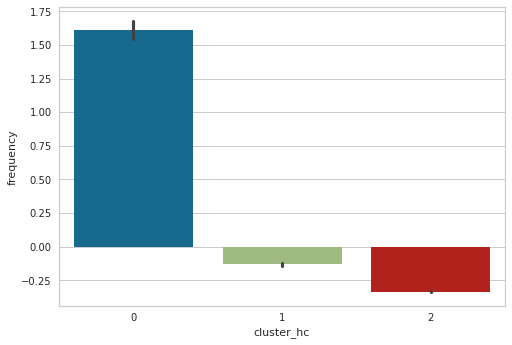

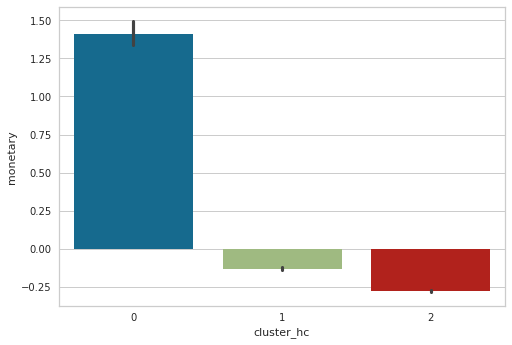

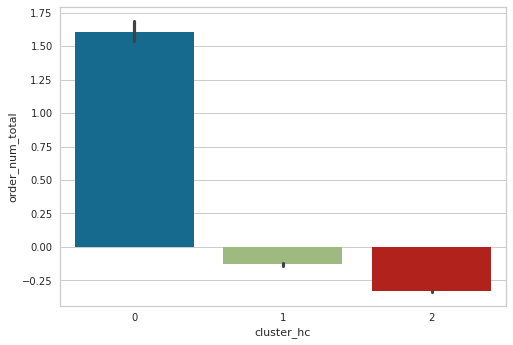

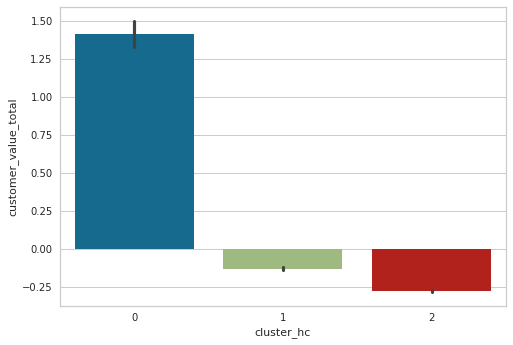

In [42]:
for i in num_cols:
    sns.barplot(x='cluster_hc', y=i, data=X)
    plt.show()